In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Mount drive, allocate the file
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Read the merged file
df_clean = pd.read_csv("/content/cleaned_data.csv")

In [ ]:
df_clean.drop(columns="next_season_trash")

,Beach_Code,Original_Beach_Name,API_Beach_Name,rating,user_ratings_total,lat,lon,Date of collection,Period,length,Trash amount,Beach was cleaned,The last time that beach has been cleaned,The last time that was cleaned from another group,further from the reference point above 100 meters,Trovato un animale abbandonato o morto,Numero di animali abbandonati o morti
0,40,Aciddara,Spiaggia Aciddara,3.5,357,38.080366,13.537345,12/05/2025,Spring 2025,"149,53",1794.0,True,NaN,False,False,True,2.0
1,40,Aciddara,Spiaggia Aciddara,3.5,357,38.080366,13.537345,13/07/2025,Summer 2025,"149,53",236.0,True,12/04/2024,False,False,False,NaN
2,40,Aciddara,Spiaggia Aciddara,3.5,357,38.080366,13.537345,30/12/2025,Winter 2025-2026,"149,53",552.0,False,13/07/2025,False,True,False,0.0
3,149,Bagni della Regina Giovanna - Sorrento (Na),Capo di Sorrento,4.7,153,40.633559,14.351224,14/12/2025,Winter 2025-2026,"9,39",738.0,True,NaN,False,False,True,1.0
4,123,Boschetto Steccato di Cutro,Spiaggia Libera Steccato di Cutro,4.4,279,38.934628,16.931957,09/07/2025,Summer 2025,"35,21",418.0,True,18/07/2025,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,120,Tombolo della Feniglia,Feniglia,4.4,3158,42.418620,11.244650,30/12/2025,Winter 2025-2026,0,69.0,True,06/03/2025,False,True,False,NaN
185,30,trabucco,Spiaggia libera Le Dune,4.0,1541,43.982570,10.135120,10/07/2025,Summer 2025,"64,16",653.0,True,29/05/2025,False,False,False,NaN
186,30,trabucco,Spiaggia libera Le Dune,4.0,1541,43.982570,10.135120,14/11/2025,Autumn 2025,"64,16",214.0,True,14/11/2025,False,False,False,0.0
187,87,Vergine Maria,Spiaggia Vergine Maria,4.0,2494,38.166260,13.368520,28/06/2025,Summer 2025,"140,01",148.0,True,28/06/2025,False,True,False,NaN


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 18 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Beach_Code                                          189 non-null    int64  
 1   Original_Beach_Name                                 189 non-null    object 
 2   API_Beach_Name                                      189 non-null    object 
 3   rating                                              189 non-null    float64
 4   user_ratings_total                                  189 non-null    int64  
 5   lat                                                 189 non-null    float64
 6   lon                                                 189 non-null    float64
 7   Date of collection                                  189 non-null    object 
 8   Period                                              189 non-null    object 
 9  

### Continue with data analysis

In [ ]:
#find if there is a o correlation of beaches that have trash amount and reviews or user total ratings

beach_aggregated = df_clean.groupby("Original_Beach_Name").agg({
    "API_Beach_Name": "first",
    "Trash amount": "sum",
    "rating": "first",
    "user_ratings_total": "first",
    "length": "first",
    "lat": "first",
    "lon": "first",
}).reset_index()

In [ ]:
# Save the aggregated file because it will be later used for density maps
beach_aggregated.to_csv('Beach_Aggregated.csv', index=False)

In [ ]:
#
df_filtered = df_clean[
    (df_clean["rating"] >= 0) & (df_clean["rating"] <= 5)
]


In [ ]:
beach_aggregated.head(7)

,Original_Beach_Name,API_Beach_Name,Trash amount,rating,user_ratings_total,length,lat,lon
0,Aciddara,Spiaggia Aciddara,2582.0,3.5,357,149.53,38.080366,13.537345
1,Bagni della Regina Giovanna - Sorrento (Na),Capo di Sorrento,738.0,4.7,153,9.39,40.633559,14.351224
2,Boschetto Steccato di Cutro,Spiaggia Libera Steccato di Cutro,599.0,4.4,279,35.21,38.934628,16.931957
3,Cala Santa Maria,Torre Cala Santa Maria,138.0,4.0,9,70.84,38.708912,13.195334
4,Caletta Caretta,Punta Penna Grossa Beach,224.0,4.4,1788,105.97,40.722365,17.771874
5,Caletta di Sant'Elia,Sant'Elia,660.0,4.6,1065,18.38,38.096542,13.538822
6,Capo Arena- budda beach,Buddha Beach,2375.0,4.3,487,331.06,39.875178,15.783663


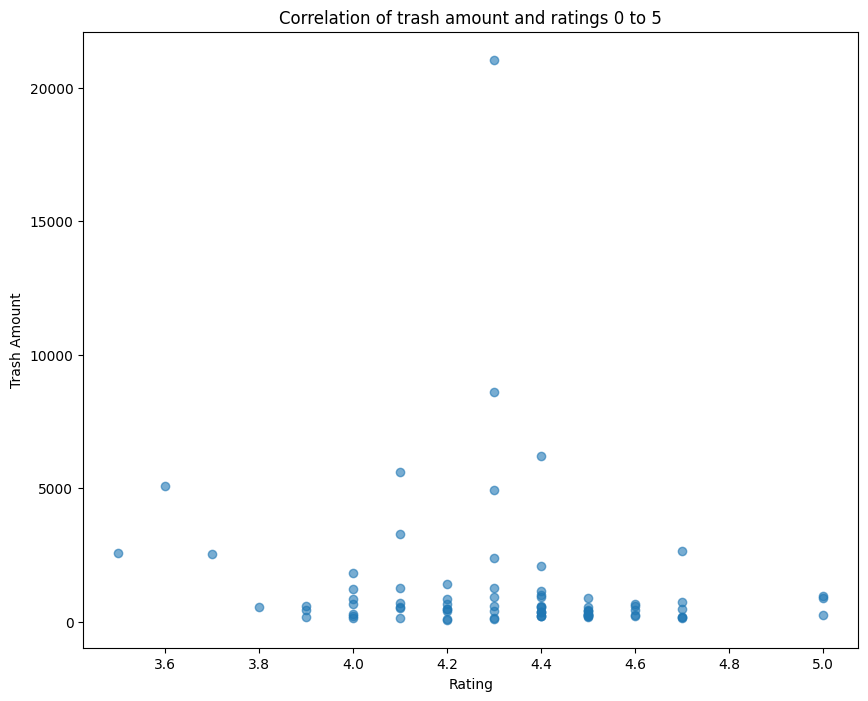

In [ ]:
# Visualize the results
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(beach_aggregated["rating"], beach_aggregated["Trash amount"], alpha=0.6)


ax.set_title("Correlation of trash amount and ratings 0 to 5")
ax.set_xlabel("Rating")
ax.set_ylabel("Trash Amount")
plt.show()

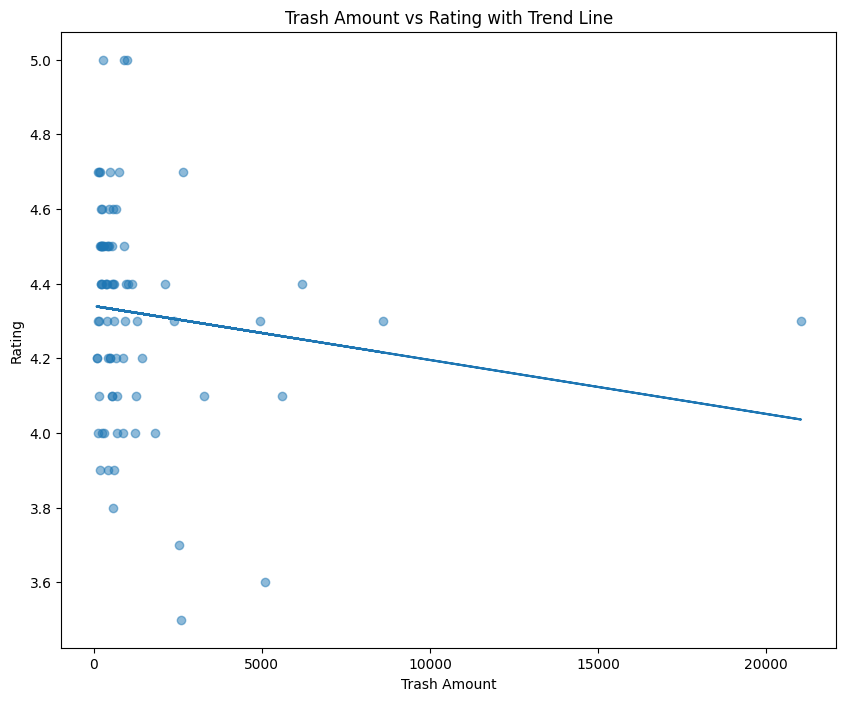

In [ ]:
# Create a 2D plot with a trend line of the trash amount vs the user rating
import numpy as np

x = beach_aggregated["Trash amount"]
y = beach_aggregated["rating"]

# Remove NaNs
mask = x.notna() & y.notna()
x = x[mask]
y = y[mask]

# Fit trend line
m, b = np.polyfit(x, y, 1)

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x, y, alpha=0.5)
ax.plot(x, m*x + b)

ax.set_title("Trash Amount vs Rating with Trend Line")
ax.set_xlabel("Trash Amount")
ax.set_ylabel("Rating")

plt.show()


In [ ]:
# Keep data within the 95th percentile, remove outliers
filtered = beach_aggregated[
    (beach_aggregated["user_ratings_total"] <= beach_aggregated["user_ratings_total"].quantile(0.95)) &
    (beach_aggregated["Trash amount"] <= beach_aggregated["Trash amount"].quantile(0.95))
]

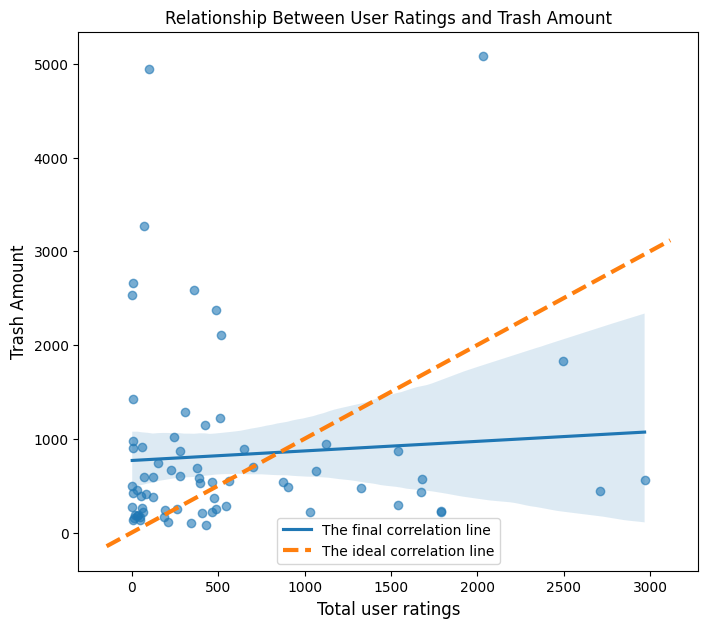

In [ ]:
# Create 2D plot using seaborn library
fig, ax = plt.subplots(figsize = (8,7))



# Regression plot fit in the data
sns.regplot(
    data=filtered,
    x="user_ratings_total",
    y="Trash amount",
    scatter_kws={"alpha": 0.6},
    ax=ax,
)

# Set label on the regression line
ax.lines[0].set_label("The actual correlation line")

# Get current axis limits
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

# Use the overlapping range so the line is truly diagonal
line_min = max(x_min, y_min)
line_max = min(x_max, y_max)

# Plot diagonal line
ax.plot(
    [line_min, line_max],
    [line_min, line_max],
    linestyle="--",
    linewidth=3,
    label="The ideal correlation line"
)

ax.set_ylabel("Trash Amount", fontsize = 12)
ax.set_xlabel("Total user ratings", fontsize = 12)
ax.set_title("Relationship Between User Ratings and Trash Amount")
ax.legend()

plt.show()

Above we implement a regplot which fits and draws a regression line that summarizes the relationship between Trash Amount and Total User Ratings. Since, the line is flat it leads to the result that there is weak or no relationship.


---WHAT WENT GOOD---

1. Script runs smoothly and correctly, reads, cleans, and modifies input data resulting in various plots and graphs, showing the relationship of our variables.

2. df_cleaned.groupby() correctly calls, groups and aggregates all rows of the needed columns in the data

3. Removing the outliers was a good choice to prevent bias and stabilize the variance of the variables.

-------------------------------------------------------------------------------

---WHAT WENT BADLY---

1. Majority of the results show no corellation among our variables inidcating as an answer to our **RQ** we would need more robust data to support our analysis.

-------------------------------------------------------------------------------

---WHAT COULD BE IMPROVED---

1. Using better variables rather than user_ratings, explore alternative tourist indicators (include more observations)

2. Before setting margin of outliers, clean noise and repeatance of the data and then continue with removing NaN values (as we already did).

3. Rather than simple statistics we could train, test, and fit a model based on a Linear Regression  algorithm that could fit the line based on possible  p-values provided by a more extensive dataset.

4. Use different type of plots and graphs to visualize the relationship.

5. Use the groupby() function more in the whole project for handling data among all the files.